# Quantum Fourier Transform

The QFT is an important subroutine to many quantum algorithms, most famously Shor's algorithm for factoring and the quantum phase estimation (QPE) algorithm for estimating the eigenvalues of a unitary operator [1, 2]. The QFT can be performed efficiently on a quantum computer, using only
single-qubit Hadamard gates and two-qubit controlled phase shift gates, where is the number of qubits. We first review the basics of the quantum Fourier transform, and its relation to the discrete (classical) Fourier transform. We then implement the QFT in code two ways: recursively and non-recursively. 

## Reference

[1] Wikipedia: https://en.wikipedia.org/wiki/Quantum_Fourier_transform

[2] Nielsen, Michael A., Chuang, Isaac L. (2010). Quantum Computation and Quantum Information (2nd ed.). Cambridge: Cambridge University Press.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from braket.circuits import Circuit
from braket.devices import LocalSimulator

from braket.experimental.algorithms.quantum_fourier_transform import (
    quantum_fourier_transform as qft,
)

# Circuits

In [2]:
n_qubits = 4
circuit = qft.quantum_fourier_transform(range(n_qubits))
print(circuit)

T  : |0|     1     |      2      |           3           |      4      |     5     | 6  | 7  |
                                                                                              
q0 : -H-PHASE(1.57)-PHASE(0.79)---PHASE(0.39)--------------------------------------------SWAP-
        |           |             |                                                      |    
q1 : ---C-----------|-----------H-|-----------PHASE(1.57)-PHASE(0.79)---------------SWAP-|----
                    |             |           |           |                         |    |    
q2 : ---------------C-------------|-----------C-----------|-----------H-PHASE(1.57)-SWAP-|----
                                  |                       |             |                |    
q3 : -----------------------------C-----------------------C-------------C-----------H----SWAP-

T  : |0|     1     |      2      |           3           |      4      |     5     | 6  | 7  |


In [3]:
circuit = qft.inverse_quantum_fourier_transform(range(n_qubits))
print(circuit)

T  : |    0    |1|     2      |      3       |            4            |      5       |     6      |7|
                                                                                                      
q0 : -SWAP-------------------------------------------------PHASE(-0.39)---PHASE(-0.79)-PHASE(-1.57)-H-
      |                                                    |              |            |              
q1 : -|----SWAP------------------PHASE(-0.79)-PHASE(-1.57)-|------------H-|------------C--------------
      |    |                     |            |            |              |                           
q2 : -|----SWAP---PHASE(-1.57)-H-|------------C------------|--------------C---------------------------
      |           |              |                         |                                          
q3 : -SWAP------H-C--------------C-------------------------C------------------------------------------

T  : |    0    |1|     2      |      3       |            4            |

# Local Simulator

## Example 1

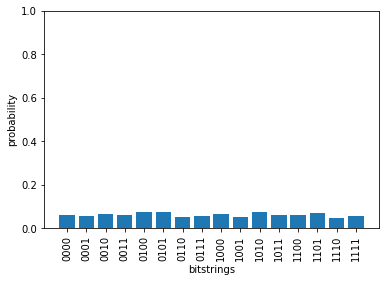

In [4]:
task = qft.run_quantum_fourier_transform(
    qubits=range(4),
    n_shots=1000,
    device=LocalSimulator()
)
probabilities = task.result().values[0]
qft.plot_bitstrings(probabilities)

## Example 2

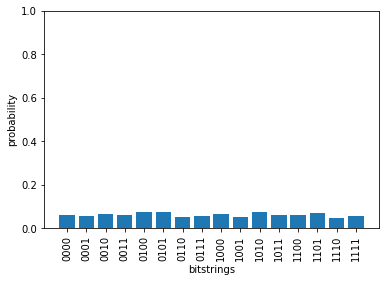

In [5]:
h_tgt=2
state_prep_circ = Circuit().h(h_tgt)

result = qft.run_quantum_fourier_transform(
    qubits=range(4),
    n_shots=1000,
    state_prep_circ=state_prep_circ, 
    device=LocalSimulator()
)

probabilities = task.result().values[0]
qft.plot_bitstrings(probabilities)

## Example 3

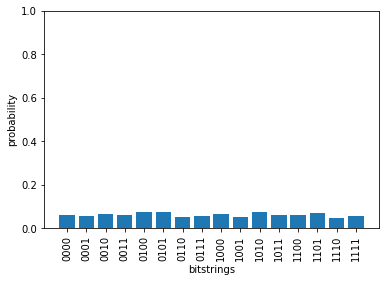

In [6]:
circ = Circuit()
circ.h(range(n_qubits))
for ii in range(n_qubits - 1):
    circ.rz(ii+1, np.pi/(2**ii))
    
result = qft.run_quantum_fourier_transform(
    qubits=range(4),
    n_shots=1000,
    state_prep_circ=circ, 
    inverse=True, # inverse-qft
    device=LocalSimulator()
)

probabilities = task.result().values[0]
qft.plot_bitstrings(probabilities)

# Quantum devices

In [7]:
from braket.aws import AwsDevice
from braket.tracking import Tracker

t = Tracker().start()

device = AwsDevice('arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy')

## Example 1

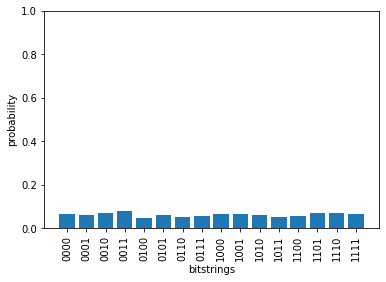

In [8]:
# result = qft.run_quantum_fourier_transform(
#     qubits=range(4),
#     n_shots=1000,
#     device=device
# )

# probabilities = task.result().values[0]
# qft.plot_bitstrings(probabilities)

## Example 2

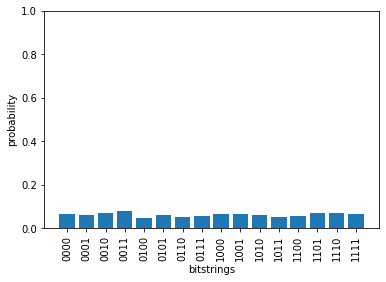

In [9]:
# h_tgt=2
# state_prep_circ = Circuit().h(h_tgt)

# result = qft.run_quantum_fourier_transform(
#     qubits=range(4),
#     n_shots=1000,
#     state_prep_circ=state_prep_circ, 
#     device=device
# )

# probabilities = task.result().values[0]
# qft.plot_bitstrings(probabilities)

## Example 3

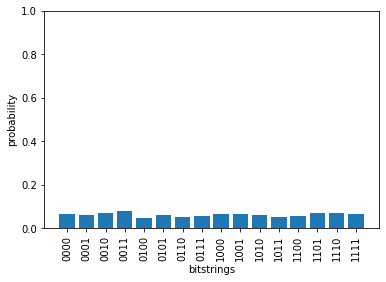

In [10]:
# circ = Circuit()
# circ.h(range(n_qubits))
# for ii in range(n_qubits - 1):
#     circ.rz(ii+1, np.pi/(2**ii))
    
# result = qft.run_quantum_fourier_transform(
#     qubits=range(4),
#     n_shots=1000,
#     state_prep_circ=circ, 
#     inverse=True, # inverse-qft
#     device=device
# )

# probabilities = task.result().values[0]
# qft.plot_bitstrings(probabilities)

In [11]:
t.stop()
print("Task Summary for device")
print(t.quantum_tasks_statistics())

Task Summary for device
{'arn:aws:braket:::device/quantum-simulator/amazon/sv1': {'shots': 3000, 'tasks': {'COMPLETED': 3}, 'execution_duration': datetime.timedelta(microseconds=19000), 'billed_execution_duration': datetime.timedelta(seconds=9)}}
